# Red Neuronal Convolucional

Se esta utilizando un dataset privado y etiquetado para este proyecto

Se esta utilizando **VGG16**

*VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION*

Una caracteristica interesante de esta CNN es que utiliza filtros convulucionales de 3x3 lo cual le permitio a los creadores ser reconocidos por esta arquitectura.  

*<font size="2">your_text_here</font>*

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.python.keras.optimizers import TFOptimizer
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,BatchNormalization
from tensorflow.keras import models
from keras import initializers
from keras import backend as K
from PIL import Image

Using TensorFlow backend.


In [2]:
labels = pd.read_csv(r'../bbox_data.csv')
#labels[2000:2010]

In [8]:
def displayOne(id):
    img = mpimg.imread(r'../train_img/derimg/' + labels.iloc[id]['idn'])

    #plt.imshow(img)
    #plt.show()

    figure, ax = plt.subplots(1)
    bbox = patches.Rectangle((labels.iloc[id]['left'],labels.iloc[id]['top']),labels.iloc[id]['width'],labels.iloc[id]['height'], edgecolor='r', facecolor="none")
    ax.imshow(img)
    ax.add_patch(bbox)

    plt.figure(figsize=(30,30))
    plt.show()

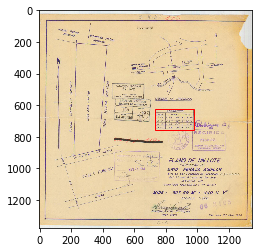

<Figure size 2160x2160 with 0 Axes>

In [9]:
displayOne(500)

In [10]:
labels.iloc[500]

id                            500
idn             100021651966.jpeg
Dataset Name               parte7
top                           623
left                          733
height                        136
width                         248
ancho                        1377
alto                         1377
y1                       0.452433
x1                       0.532317
y2                      0.0987654
x2                       0.180102
Name: 500, dtype: object

In [12]:
#(labels.iloc[0]['top'],labels.iloc[0]['left']),labels.iloc[0]['height'],labels.iloc[0]['width']

In [257]:
# Carga de bboxes
#boxes = labels[['y1','x1','y2','x2']]
#boxes = boxes.values

In [259]:
#boxes.shape

(2048, 4)

In [13]:
def read_img(path, shape):
    img = Image.open(r"../train_img/derimg/" + path)
    img_size = img.size
    img = img.resize(shape, Image.ANTIALIAS)
    img = np.asarray(img)
    return img, img_size

#t = read_img(r'../train_img/derimg/100000101967.jpeg',(224,224))
#type(t)


#for traj in os.listdir(r"../train_img/derimg"):
#    cont += 1
trX = []
trName = []
trSize = []
cont = 0
for file in os.listdir(r"../train_img/derimg"):
    cont +=1
    print('Procesando: {};  \r'.format(cont), end="")
    #filename = os.path.basename(file_n)
    trName.append(file)
    img, img_size = read_img(file, (224, 224))
    trX.append(img)
    trSize.append(img_size)
len(trX)

2048

In [14]:
#len(trX[0])
#trX[0]
trX = np.array(trX, dtype=np.uint8)
trX.shape

(2048, 224, 224, 3)

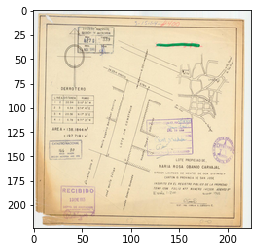

In [15]:
plt.imshow(trX[110])

In [16]:
len(trX[0][100])
trX[0][100][0:10]

array([[235, 235, 235],
       [235, 237, 236],
       [234, 238, 236],
       [231, 236, 237],
       [229, 226, 220],
       [230, 219, 196],
       [234, 223, 195],
       [233, 221, 195],
       [234, 222, 196],
       [233, 221, 195]], dtype=uint8)

In [17]:
#print(trX[0].shape)
trX = trX/255.


In [18]:
trX[0][100][0:10]

array([[0.92156863, 0.92156863, 0.92156863],
       [0.92156863, 0.92941176, 0.9254902 ],
       [0.91764706, 0.93333333, 0.9254902 ],
       [0.90588235, 0.9254902 , 0.92941176],
       [0.89803922, 0.88627451, 0.8627451 ],
       [0.90196078, 0.85882353, 0.76862745],
       [0.91764706, 0.8745098 , 0.76470588],
       [0.91372549, 0.86666667, 0.76470588],
       [0.91764706, 0.87058824, 0.76862745],
       [0.91372549, 0.86666667, 0.76470588]])

In [19]:
from numpy import asarray
from numpy import save
# save to npy file
save('img_values.npy', trX)
save('names.npy', trName)
save('sizes.npy', trSize)


In [3]:
# load numpy array from npy file
from numpy import load
# load array
trX = load('img_values.npy')
trName = load('names.npy')
trSize = load('sizes.npy')


In [4]:
trX[20:25,20:25,1]

array([[[0.91372549, 0.92941176, 0.9254902 ],
        [0.92156863, 0.92941176, 0.92941176],
        [0.92156863, 0.93333333, 0.92941176],
        [0.92156863, 0.9372549 , 0.9254902 ],
        [0.92156863, 0.9372549 , 0.92941176]],

       [[0.8745098 , 0.8745098 , 0.84705882],
        [0.85490196, 0.85490196, 0.81960784],
        [0.87058824, 0.8745098 , 0.83529412],
        [0.8745098 , 0.86666667, 0.83529412],
        [0.87843137, 0.85882353, 0.83137255]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.27843137, 0.2627451 , 0.28235294],
        [0.26666667, 0.25490196, 0.27058824],
        [0.25490196, 0.25490196, 0.26666667],
        [0.24705882, 0.25098039, 0.2745098 ],
        [0.24705882, 0.24705882, 0.27843137]],

       [[0.94117647, 0.96078431, 0.94509804],
        [0.9372549 , 0.960

In [23]:
trName[0:10]

array(['100000011971.jpeg', '100000011973.jpeg', '100000021966.jpeg',
       '100000021968.jpeg', '100000021969.jpeg', '100000021971.jpeg',
       '100000021977.jpeg', '100000031968.jpeg', '100000031971.jpeg',
       '100000041977.jpeg'], dtype='<U17')

Ordenar valores X con los valores Y

In [5]:
yTrain = []
for item in trName:
    fila = labels.loc[labels['idn'] == item]
    t = fila.values[0]
    yTrain.append([t[9],t[10],t[11],t[12]])
yTrain = np.array(yTrain)
yTrain[0:10]

array([[0.07460545, 0.42611191, 0.09397417, 0.19583931],
       [0.09025641, 0.83282051, 0.31692308, 0.2625641 ],
       [0.07872175, 0.36944661, 0.1441933 , 0.20654716],
       [0.26199262, 0.39621771, 0.10055351, 0.18588561],
       [0.33304348, 0.88956522, 0.1773913 , 0.22608696],
       [0.04385965, 1.08089669, 0.11500975, 0.2582846 ],
       [0.8184699 , 0.14440923, 0.10774106, 0.12947035],
       [0.06774809, 1.05343512, 0.11068702, 0.24713741],
       [0.02931596, 1.18892508, 0.10162866, 0.1732899 ],
       [0.70700637, 0.14194723, 0.16014559, 0.24021838]])

In [261]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    #zoom_range=0.2,
)

# configuracion de imagenes de entrada para train
train_data = train_datagen.flow_from_directory(
    r'../small',
    target_size=(224,224), 
    batch_size=128,
    classes=None,
    class_mode=None,
    #interpolation='bicubic'
)

Found 4 images belonging to 1 classes.


In [5]:
files = ['100000101967.jpeg','100000321966.jpeg','100000581968.jpeg','100000111966.jpeg']
#files = ['derimg/100000101967.jpeg','derimg/100000321966.jpeg','derimg/100000581968.jpeg','derimg/100000111966.jpeg']
lb = [[0.048625793,0.057082452,0.083157153,0.190274841],
    [0.732524552,0.129404968,0.129982669,0.162333911],
    [0.048323471,1.111439842,0.193293886,0.252465483],
    [0.119258662,0.580177276,0.120064464,0.284448026]]
#lb = ['a','b','a','b']

'''
lb = np.array([[[0.048625793],[0.057082452],[0.083157153],[0.190274841]],
    [[0.732524552],[0.129404968],[0.129982669],[0.162333911]],
    [[0.048323471],[1.111439842],[0.193293886],[0.252465483]],
    [[0.119258662],[0.580177276],[0.120064464],[0.284448026]]])
'''
'''
lb = np.array([[0.048625793],
    [0.732524552],
    [0.048323471],
    [0.119258662],
    [0.048625793],
    [0.732524552],
    [0.048323471],
    [0.119258662]])
    '''

'''
lb = [[(0.048625793,0.057082452),(0.083157153,0.190274841)],
    [(0.732524552,0.129404968),(0.129982669,0.162333911)],
    [(0.048323471,1.111439842),(0.193293886,0.252465483)],
    [(0.119258662,0.580177276),(0.120064464,0.284448026)],
    [(0.048625793,0.057082452),(0.083157153,0.190274841)],
    [(0.732524552,0.129404968),(0.129982669,0.162333911)],
    [(0.048323471,1.111439842),(0.193293886,0.252465483)],
    [(0.119258662,0.580177276),(0.120064464,0.284448026)],
    ]
'''
y1 =[0.048625793,0.732524552,0.048323471,0.119258662]
x1 =[0.057082452,0.129404968,1.111439842,0.580177276]
y2 =[0.083157153,0.129982669,0.193293886,0.120064464]
x2 =[0.190274841,0.162333911,0.252465483,0.284448026]

#frame_data = pd.DataFrame(list(zip(files, y1,x1,y2,x2)), 
#               columns =['imagenes', 'y1','x1','y2','x2']) 
frame_data = pd.DataFrame(list(zip(files, lb)), 
               columns =['imagenes', 'boxes']) 

frame_data

,imagenes,boxes
0,100000101967.jpeg,"[0.048625793, 0.057082452, 0.083157153, 0.1902..."
1,100000321966.jpeg,"[0.732524552, 0.129404968, 0.129982669, 0.1623..."
2,100000581968.jpeg,"[0.048323471, 1.111439842, 0.193293886, 0.2524..."
3,100000111966.jpeg,"[0.119258662, 0.580177276, 0.120064464, 0.2844..."


In [265]:
lb[0]

[0.048625793, 0.057082452, 0.083157153, 0.190274841]

In [253]:
train_datagen = ImageDataGenerator(
    rescale=1./255.)

train_data = train_datagen.flow_from_dataframe(
    frame_data,
    directory='../train_img/derimg',
    x_col="imagenes",
    #y_col=list(map(tf.feature_column.numeric_column,['y1','x1','y2','x2'])),
    y_col='boxes',
    #classes=None,
    class_mode= 'categorical'
    # func
    #class_mode= 'multi_output', #None,
    #y_col=['y1','x1','y2','x2'],
    
    #y_col='asdf2',
)

Found 4 validated image filenames belonging to 2 classes.


In [226]:
#train_data[0][1]

In [6]:
cnn = Sequential()

cnn.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(224,224,3), activation='relu', name='uno')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='dos')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='tres')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='cuatro')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='cinco')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(units=512, activation = 'relu', name='dense_uno'))

cnn.add(Dense(units=4, activation='softmax', name='dense_dos'))

In [7]:
# Compilador de la red
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
uno (Conv2D)                 (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
dos (Conv2D)                 (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
tres (Conv2D)                (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
cuatro (Conv2D)              (None, 24, 24, 64)       

In [9]:
print(trX.shape)
#print(lb.shape)
lb = np.array([[0.048625793,0.057082452,0.083157153,0.190274841],
    [0.732524552,0.129404968,0.129982669,0.162333911],
    [0.048323471,1.111439842,0.193293886,0.252465483],
    [0.119258662,0.580177276,0.120064464,0.284448026]])
lb.shape

(4, 224, 224, 3)


(4, 4)

In [157]:
vgg16 = Sequential(name='vgg16')

# Block1
vgg16.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(224,224,3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block1_conv1')) 
vgg16.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block1_conv2')) 
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), name='block1_pool'))

# Block 2
vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block2_conv1')) 
vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block2_conv2'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block3_conv1'))
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block3_conv2'))
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block3_conv3'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block4_conv1'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block4_conv2'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block4_conv3'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block5_conv1'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block5_conv2'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer=initializers.RandomNormal(), name='block5_conv3'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Classification block
vgg16.add(Flatten(name='flatten'))
vgg16.add(Dense(4096, activation='relu', name='fc1'))
vgg16.add(Dense(4096, activation='relu', name='fc2'))
vgg16.add(Dense(4, activation='softmax', name='predictions'))

    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hecto\AppData\Local\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-157-d856fac158a3>", line 33, in <module>
    vgg16.add(Dense(4096, activation='relu', name='fc1'))
  File "C:\Users\hecto\AppData\Local\Programs\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 182, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\hecto\AppData\Local\Programs\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 75, in symbolic_fn_wrapper
    return func(*args, **kwargs)
  File "C:\Users\hecto\AppData\Local\Programs\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 463, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\Users\hecto\AppData\Local\Programs\Anaconda3\lib\site-packages\keras\layers\core.py", line 895, in build
    constraint=self.kernel_co

ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [ ]:
vgg16.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
vgg16.summary()

In [41]:
trX[0:10].shape, yTrain.shape

((10, 224, 224, 3), (2048, 4))

In [42]:
resultado = vgg16.fit(trX, yTrain,
                batch_size=16,
                #steps_per_epoch=16, 
                #validation_steps=16,
                #validation_steps=200,
                validation_split=0.2,
                #steps_per_epoch=25,
                #validation_steps=200,
                epochs=5,
                verbose=1)

Train on 1638 samples, validate on 410 samples
Epoch 1/5
1638/1638 [==============================] - 71s 43ms/step - loss: 0.1016 - accuracy: 0.8010 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 2/5
1638/1638 [==============================] - 60s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 3/5
1638/1638 [==============================] - 60s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 4/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 5/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951


In [55]:
b_aprox = vgg16.predict(trX[2000:2005])
b_aprox

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [56]:
yTrain[2000:2005]

array([[0.14614394, 0.56156819, 0.3548684 , 0.16050064],
       [0.20522656, 0.46895229, 0.07480221, 0.20690482],
       [0.14614394, 0.56396098, 0.52549236, 0.15866004],
       [0.15203387, 0.5643291 , 0.09405485, 0.15534695],
       [0.20288773, 0.46626836, 0.1849639 , 0.21508589]])

In [104]:
type(vgg16.predict)

method

In [101]:
trX[0][0:,0:,1].shape

(224, 224)

In [114]:
#trX[110][0:5]*255
#plt.imshow(np.array(trX[110]))
f1 = vgg16.predict(trX[FIRST_IMAGE].reshape(1, 224, 224, 3))[0]
f1

array([0., 1., 0., 0.], dtype=float32)

In [87]:
#layer_outputs = [layer.output for layer in vgg16.layers]
#layer_outputs
vgg16.input

<tf.Tensor 'block1_conv1_input:0' shape=(None, 224, 224, 3) dtype=float32>

In [130]:
for x in range(0,4): # use first layers of the model: conv1,pool1,conv2,pool2
    print(x)


0
1
2
3


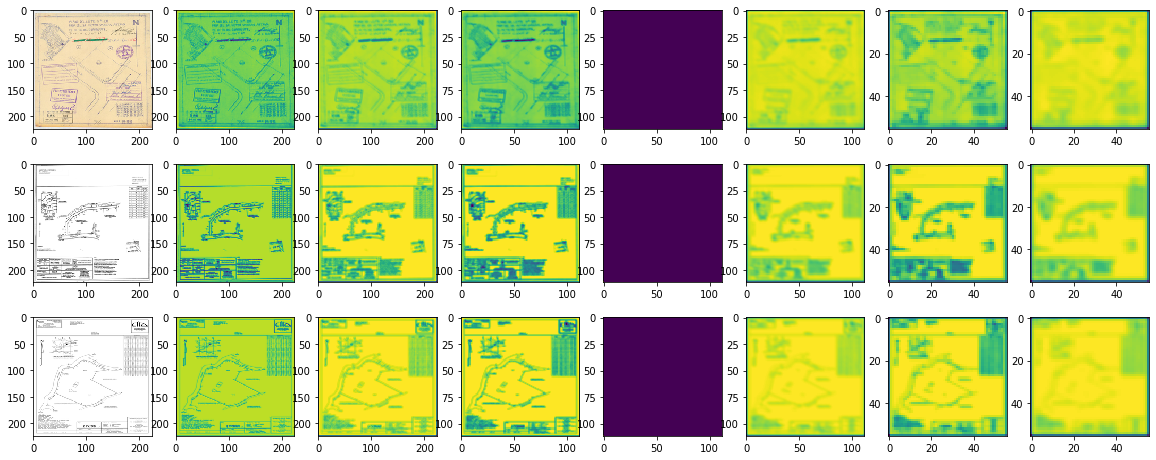

In [149]:
f, axarr = plt.subplots(3,8, figsize=(20, 8))
#selected_label = 9 # for analyzing images with the given label
#images_with_selected_lbl = np.where(test_labels == selected_label)[0]


FIRST_IMAGE=100
SECOND_IMAGE=1000
THIRD_IMAGE=2000
FILTER_NUMBER = 2 # every conv layer has many filters, this selects which one to visualize

# following code creates an "activation model", a model that takes an input and 
# generates a list of all layers actiations for another trained model
#from tensorflow.keras import models
layer_outputs = [layer.output for layer in vgg16.layers]
activation_model = keras.models.Model(inputs=vgg16.input,outputs=layer_outputs)

# visualization will have 1 row for every test image, and  4 columns:
# 1st column is the original image
# 2nd column is for the 1st convolution
# 3rd column is for the 1st pooling
# 4th column is for the 2nd convolution
# 5th column is for the 2nd pooling
axarr[0,0].imshow((trX[FIRST_IMAGE]))
axarr[1,0].imshow((trX[SECOND_IMAGE]))
axarr[2,0].imshow((trX[THIRD_IMAGE]))

for x in range(0,7): # use first layers of the model: conv1,pool1,conv2,pool2
    #print(x)
    # predict returns tensor of shape: number_images, height,width, number of filter
    f1 = activation_model.predict(trX[FIRST_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[0,x+1].imshow(f1[0, : , :, FILTER_NUMBER])
    axarr[0,x+1].grid(False)
    f2 = activation_model.predict(trX[SECOND_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[1,x+1].imshow(f2[0, : , :, FILTER_NUMBER])
    axarr[1,x+1].grid(False)
    f3 = activation_model.predict(trX[THIRD_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[2,x+1].imshow(f3[0, : , :, FILTER_NUMBER])
    axarr[2,x+1].grid(False)

plt.show()

In [122]:
#layer_outputs = [layer.output for layer in vgg16.layers]
#dir(vgg16)
vgg16.inputs
activation_model =keras.models.Model(inputs=vgg16.input,outputs=layer_outputs)

In [137]:
trX[0][:,:,2]

array([[0.9254902 , 0.9254902 , 0.9254902 , ..., 0.95294118, 0.94901961,
        0.95294118],
       [0.9254902 , 0.9254902 , 0.9254902 , ..., 0.95294118, 0.95294118,
        0.95294118],
       [0.92156863, 0.9254902 , 0.92941176, ..., 0.94901961, 0.94901961,
        0.94509804],
       ...,
       [0.90980392, 0.90980392, 0.91372549, ..., 0.94509804, 0.94117647,
        0.94117647],
       [0.9254902 , 0.9254902 , 0.93333333, ..., 0.94117647, 0.94901961,
        0.94117647],
       [0.92941176, 0.93333333, 0.9372549 , ..., 0.94117647, 0.94901961,
        0.94509804]])

In [110]:
list(map(tf.feature_column.numeric_column,['y1','x1','y2','x2']))

[NumericColumn(key='y1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='x1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='y2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='x2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [6]:
from keras.applications import VGG16

In [7]:
carga = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
carga.trainable = False

In [8]:
newModel = carga.output
newModel = Dropout(0.5,name='dropout05')(newModel)
newModel = Flatten(name='flatten')(newModel)
newModel = Dense(4096, activation='relu', name='fc1')(newModel)
newModel = Dropout(0.2)(newModel)
newModel = Dense(4096, activation='relu', name='fc2')(newModel)
newModel = Dense(4, activation='softmax', name='predictions')(newModel)
modelFvgg = keras.Model(carga.input, newModel)


In [9]:
modelFvgg.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [10]:
resultado2 = modelFvgg.fit(trX, yTrain,
                batch_size=16,
                #steps_per_epoch=16, 
                #validation_steps=16,
                #validation_steps=200,
                validation_split=0.2,
                #steps_per_epoch=25,
                #validation_steps=200,
                epochs=5,
                verbose=1)

Train on 1638 samples, validate on 410 samples
Epoch 1/5
1638/1638 [==============================] - 71s 43ms/step - loss: 0.1029 - accuracy: 0.8010 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 2/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 3/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 4/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951
Epoch 5/5
1638/1638 [==============================] - 61s 37ms/step - loss: 0.1024 - accuracy: 0.8089 - val_loss: 0.0812 - val_accuracy: 0.9951


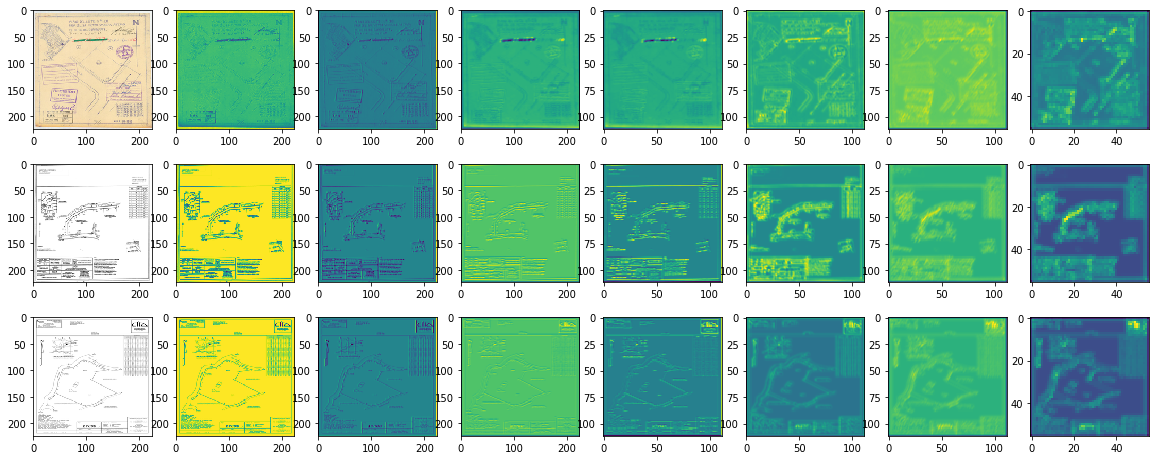

In [33]:
f, axarr = plt.subplots(3,8, figsize=(20, 8))
#selected_label = 9 # for analyzing images with the given label
#images_with_selected_lbl = np.where(test_labels == selected_label)[0]


FIRST_IMAGE=100
SECOND_IMAGE=1000
THIRD_IMAGE=2000
FILTER_NUMBER = 2 # every conv layer has many filters, this selects which one to visualize

# following code creates an "activation model", a model that takes an input and 
# generates a list of all layers actiations for another trained model
#from tensorflow.keras import models
layer_outputs = [layer.output for layer in modelFvgg.layers]
activation_model = keras.models.Model(inputs=modelFvgg.input,outputs=layer_outputs)

# visualization will have 1 row for every test image, and  4 columns:
# 1st column is the original image
# 2nd column is for the 1st convolution
# 3rd column is for the 1st pooling
# 4th column is for the 2nd convolution
# 5th column is for the 2nd pooling
axarr[0,0].imshow((trX[FIRST_IMAGE]))
axarr[1,0].imshow((trX[SECOND_IMAGE]))
axarr[2,0].imshow((trX[THIRD_IMAGE]))

for x in range(0,7): # use first layers of the model: conv1,pool1,conv2,pool2
    #print(x)
    # predict returns tensor of shape: number_images, height,width, number of filter
    f1 = activation_model.predict(trX[FIRST_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[0,x+1].imshow(f1[0, : , :, FILTER_NUMBER])
    axarr[0,x+1].grid(False)
    f2 = activation_model.predict(trX[SECOND_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[1,x+1].imshow(f2[0, : , :, FILTER_NUMBER])
    axarr[1,x+1].grid(False)
    f3 = activation_model.predict(trX[THIRD_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[2,x+1].imshow(f3[0, : , :, FILTER_NUMBER])
    axarr[2,x+1].grid(False)

plt.show()

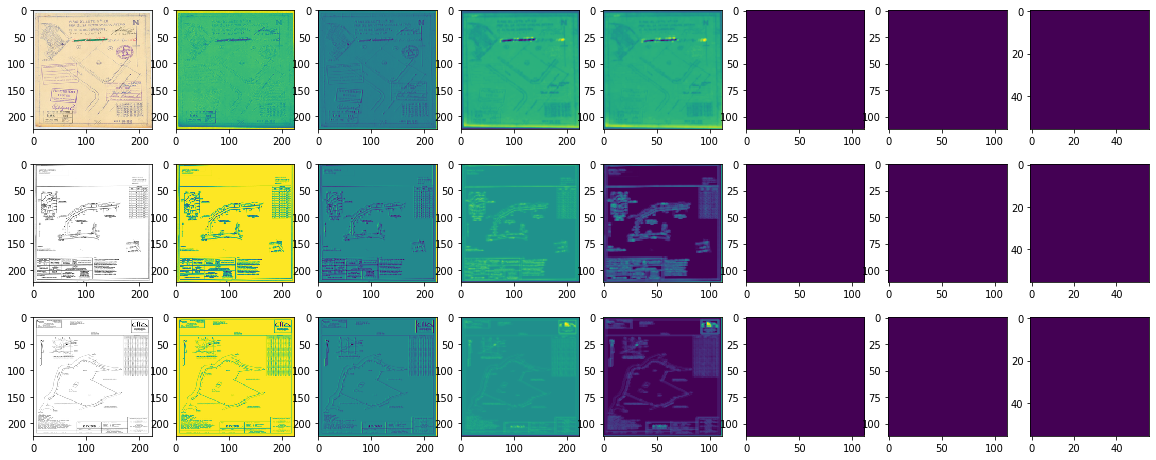

In [23]:
f, axarr = plt.subplots(3,8, figsize=(20, 8))
#selected_label = 9 # for analyzing images with the given label
#images_with_selected_lbl = np.where(test_labels == selected_label)[0]


FIRST_IMAGE=100
SECOND_IMAGE=1000
THIRD_IMAGE=2000
FILTER_NUMBER = 2 # every conv layer has many filters, this selects which one to visualize

# following code creates an "activation model", a model that takes an input and 
# generates a list of all layers actiations for another trained model
#from tensorflow.keras import models
layer_outputs = [layer.output for layer in modelFvgg.layers]
activation_model = keras.models.Model(inputs=modelFvgg.input,outputs=layer_outputs)

# visualization will have 1 row for every test image, and  4 columns:
# 1st column is the original image
# 2nd column is for the 1st convolution
# 3rd column is for the 1st pooling
# 4th column is for the 2nd convolution
# 5th column is for the 2nd pooling
axarr[0,0].imshow((trX[FIRST_IMAGE]))
axarr[1,0].imshow((trX[SECOND_IMAGE]))
axarr[2,0].imshow((trX[THIRD_IMAGE]))

for x in range(0,7): # use first layers of the model: conv1,pool1,conv2,pool2
    #print(x)
    # predict returns tensor of shape: number_images, height,width, number of filter
    f1 = activation_model.predict(trX[FIRST_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[0,x+1].imshow(f1[0, : , :, FILTER_NUMBER])
    axarr[0,x+1].grid(False)
    f2 = activation_model.predict(trX[SECOND_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[1,x+1].imshow(f2[0, : , :, FILTER_NUMBER])
    axarr[1,x+1].grid(False)
    f3 = activation_model.predict(trX[THIRD_IMAGE].reshape(1, 224, 224, 3))[x]
    axarr[2,x+1].imshow(f3[0, : , :, FILTER_NUMBER])
    axarr[2,x+1].grid(False)

plt.show()

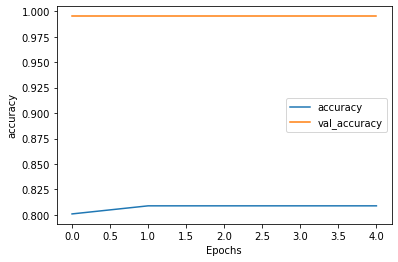

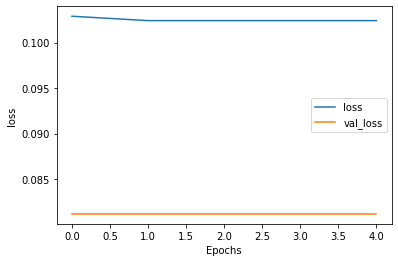

In [24]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(resultado2, 'accuracy')
plot_graphs(resultado2, 'loss')

In [18]:
modelFvgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# Conclusiones

